<a href="https://colab.research.google.com/github/Jahan08/Amber-tutorial/blob/main/PLK1_ML_Model_Part_3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part III ] Regression Models with Random Forest**

Nusrat Jahan

In this Jupyter notebook, we will be building a real-life **data science project**, we will be building a machine learning model using the ChEMBL bioactivity data.


In **Part III **, we will be building a regression model of PLK1 inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df_MACCS = pd.read_csv('/content/PLK1_bioactivity_data_pIC50_MACCS_named.csv')
df_MACCS

,Name,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166,pIC50
0,CHEMBL199996,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,5.000000
1,CHEMBL115220,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,4.698970
2,CHEMBL199658,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,4.000000
3,CHEMBL199657,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,4.000000
4,CHEMBL382070,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,CHEMBL525907,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,0,1,0,5.885723
1209,CHEMBL559845,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,7.167491
1210,CHEMBL562104,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,5.375202
1211,CHEMBL603463,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,5.000000


### Renaming Name coulumn to chemblId

In [3]:
df_MACCS = df_MACCS.rename(columns = {'Name':'chemblId'})
df_MACCS

,chemblId,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166,pIC50
0,CHEMBL199996,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,5.000000
1,CHEMBL115220,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,4.698970
2,CHEMBL199658,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,4.000000
3,CHEMBL199657,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,4.000000
4,CHEMBL382070,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,CHEMBL525907,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,0,1,0,5.885723
1209,CHEMBL559845,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,7.167491
1210,CHEMBL562104,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,5.375202
1211,CHEMBL603463,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,5.000000


### Normalizing the Fetearues

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

* Standardization, or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [4]:
#df_pubchem_X = df_PubChem.drop(columns=['chemblId'])
df_MACCS_X= df_MACCS.drop(columns=['pIC50'])
df_MACCS_X

,chemblId,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,CHEMBL199996,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
1,CHEMBL115220,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
2,CHEMBL199658,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
3,CHEMBL199657,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
4,CHEMBL382070,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,CHEMBL525907,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1209,CHEMBL559845,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
1210,CHEMBL562104,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
1211,CHEMBL603463,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [5]:
from sklearn import preprocessing

def normalized (Fp):
    
    chemblId = Fp.chemblId
    Fp_loc = Fp.iloc[:,1:]
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp_loc)
    Fp_normalized = pd.DataFrame(np_scaled)
    Fp_normalized
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp_loc.columns)
    Fp_normalized['chemblId'] = chemblId
    
    return Fp_normalized

In [6]:
Fp_MACCS_normalized = normalized (df_MACCS_X)

#### Saving into new csv file

In [7]:
Fp_MACCS_normalized.to_csv('MACCS_normalized.csv', sep=',' ,index=False)
Fp_MACCS_normalized

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166,chemblId
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,CHEMBL199996
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,CHEMBL115220
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,CHEMBL199658
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,CHEMBL199657
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,CHEMBL382070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,CHEMBL525907
1209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,CHEMBL559845
1210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,CHEMBL562104
1211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,CHEMBL603463


### checking the variance of the features

In [8]:
Fp_MACCS_normalized = Fp_MACCS_normalized.drop(columns=['chemblId'])
Fp_MACCS_normalized

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [9]:
Fp_MACCS_normalized_variance = Fp_MACCS_normalized.var()
Fp_MACCS_normalized_variance

MACCSFP1      0.000000
MACCSFP2      0.000000
MACCSFP3      0.000000
MACCSFP4      0.000000
MACCSFP5      0.000000
                ...   
MACCSFP162    0.000824
MACCSFP163    0.005742
MACCSFP164    0.041065
MACCSFP165    0.000000
MACCSFP166    0.000000
Length: 166, dtype: float64

In [10]:
Fp_MACCS_normalized_columns = Fp_MACCS_normalized.columns
Fp_MACCS_normalized_columns

Index(['MACCSFP1', 'MACCSFP2', 'MACCSFP3', 'MACCSFP4', 'MACCSFP5', 'MACCSFP6',
       'MACCSFP7', 'MACCSFP8', 'MACCSFP9', 'MACCSFP10',
       ...
       'MACCSFP157', 'MACCSFP158', 'MACCSFP159', 'MACCSFP160', 'MACCSFP161',
       'MACCSFP162', 'MACCSFP163', 'MACCSFP164', 'MACCSFP165', 'MACCSFP166'],
      dtype='object', length=166)

### Save into new files

In [11]:
print (len(Fp_MACCS_normalized))

1213


In [12]:
print (len(Fp_MACCS_normalized.columns ))

166


## Remove low variance Features

In [13]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.05):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

df_MACCS_X = remove_low_variance(Fp_MACCS_normalized, threshold=0.05)
df_MACCS_X
df_MACCS_X.var()

MACCSFP16     0.202619
MACCSFP19     0.097059
MACCSFP25     0.247376
MACCSFP36     0.180771
MACCSFP38     0.244635
                ...   
MACCSFP154    0.118819
MACCSFP155    0.242920
MACCSFP157    0.228776
MACCSFP159    0.186723
MACCSFP160    0.159338
Length: 100, dtype: float64

In [14]:
df_MACCS_X.head()

,MACCSFP16,MACCSFP19,MACCSFP25,MACCSFP36,MACCSFP38,MACCSFP42,MACCSFP47,MACCSFP50,MACCSFP52,MACCSFP53,...,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP157,MACCSFP159,MACCSFP160
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


## Remove highly correlated features
In many datasets we find some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost. 

In [ ]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    corr = stats.pearsonr
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print('from Remove correlation')
    print("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df

df = df_MACCS_X
threshold = 0.70 
df_MACCS_X_final = correlation(df, threshold)


from Remove correlation
The initial set of 310 descriptors has been reduced to 112 descriptors.


In [ ]:
df_MACCS_X_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP716,PubchemFP721,PubchemFP728,PubchemFP734,PubchemFP737,PubchemFP749,PubchemFP750,PubchemFP756,PubchemFP758,PubchemFP776
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1209,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1210,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1211,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_MACCS_X_final.shape

(1213, 112)

In [28]:
df_MACCS_Y_final = df_MACCS['pIC50']
df_MACCS_Y_final

0       5.000000
1       4.698970
2       4.000000
3       4.000000
4       4.638272
          ...   
1208    5.885723
1209    7.167491
1210    5.375202
1211    5.000000
1212    5.244125
Name: pIC50, Length: 1213, dtype: float64

In [ ]:
data_MACCS = pd.concat([df_MACCS_X_final,df_MACCS_Y_final], axis=1)
data_MACCS

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP721,PubchemFP728,PubchemFP734,PubchemFP737,PubchemFP749,PubchemFP750,PubchemFP756,PubchemFP758,PubchemFP776,pIC50
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.698970
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.885723
1209,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.167491
1210,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.375202
1211,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.000000


### Function for Machine Learning Model

In [15]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=b4ae6defbe7d45852ea2ec0cd343b4a022d8dc3f22a026ab960e5779992c2abf
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [16]:
import sklearn
import numpy as np



## Function for removing useless descriptors

In [17]:
import numpy as np

def Remove_useless_descriptor(df, threshold):
    
    des1 = len(df.columns) 
    
    h = df.columns.tolist()
    df = df.to_numpy().astype(np.float)
    df = np.array(df)

    STDEV = np.std(df, axis=0)
    idx = [idx for idx, val in enumerate(STDEV) if val > threshold]
    df2 = df[:,idx]
    hx = np.array(h)[idx]
    
    df = pd.DataFrame(df2, columns=[hx])
    
    des2 = len(df.columns)
    
    print('from Remove useless descriptor')
    print("The initial set of " + str(des1) + \
          " descriptors has been reduced to " + str(des2) + " descriptors.")
    
    return df, des1, des2

### Function for removing highly correlated data

In [18]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    corr = stats.pearsonr
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print('from Remove correlation')
    print("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df, des3, des4

### Function for Random Forest Regression Model

In [19]:
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict
import numpy as np

def build_model(X, Y, seed, hx, f):
    
    
    #Data split using 70/30 ratio
    X_internal, X_external, Y_internal, Y_external = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_internal,Y_internal)
    prediction = rf.predict(X_internal)
    
    # Cross-validation
    cv = sklearn.model_selection.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    #cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    # External set  
    prediction_external = rf.predict(X_external)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_internal, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_internal, prediction)))
    Q2_CV.append(r2_score(Y_internal, cv))
    RMSE_CV.append(np.sqrt(mean_absolute_error(Y_internal, cv)))
    Q2_External.append(r2_score(Y_external, prediction_external))
    RMSE_External.append((mean_absolute_error(Y_external, prediction_external)))
    
    #Feature Importance

    #feature_names = [f"feature {i}" for i in range(X.shape[1])]
    #importances = forest.feature_importances_
    #importances = pd.Series(importances, index=feature_names)

    Feature = [f"feature {i}" for i in range(hx.shape[0])]
    feature_importance = rf.feature_importances_
    #importances = 100.0 * (feature_importance / feature_importance.max()) #index
    importances = pd.Series(feature_importance, index=Feature)

    #Feature = hx[:]
    
    for i, fx in enumerate(Feature):
        importances_dict[fx].append(importances[i])
    
    return R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict

### Function for Scrambling Y

In [20]:
from copy import deepcopy

def Y_scrambling(X_internal, X_external, Y_internal, Y_external):
    # Do the Y-scrambling. Loop over the actual learning for 100 times.
    for randomseedcounter in range(1,101):
        y_train_scrambled = deepcopy(Y_internal)
        X_train_scrambled = deepcopy(X_internal)
        np.random.shuffle(y_train_scrambled)
        np.random.shuffle(X_train_scrambled)

        # training was done on "scrambled" data - prediction on test set
        RF_scrambled         = RandomForestRegressor()
        RF_scrambled         = RF_scrambled.fit(X_internal,y_train_scrambled)
        y_predict_scrambled  = RF_scrambled.predict(X_external)
    
        acclist_predictionOnTest_scrambledtrain.append((RF_scrambled.score(X_external,Y_external))**2)
    
        # training was done on "scrambled" data - prediction on train set
        y_predict_scrambled_predictTrain  = RF_scrambled.predict(X_internal)
    
        acclist_predictionOnTrain_scrambledtrain.append((RF_scrambled.score(X_internal,Y_internal))**2)
        
        r2 = pd.DataFrame(acclist_predictionOnTrain_scrambledtrain, columns=['R2'])
        q2 = pd.DataFrame(acclist_predictionOnTest_scrambledtrain, columns=['Q2'])

        #result = pd.concat([r2, q2], axis=1, join='inner').to_csv(f+"_Y_scrambling.csv", header=False, index=False)
        
        
    return acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain

### Find the mean of the results of the Model output

In [21]:
def mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_mean = np.mean(R2_train)
    RMSE_train_mean = np.mean(RMSE_train)
    Q2_CV_mean = np.mean(Q2_CV)
    RMSE_CV_mean = np.mean(RMSE_CV)
    Q2_External_mean = np.mean(Q2_External)
    RMSE_External_mean = np.mean(RMSE_External)
    importances_mean0 = {}
    for fx in importances_dict:
        importances_mean0[fx] = np.mean(importances_dict[fx])
    importances_mean = sorted([(k,v) for k,v in importances_mean0.items()],
                                    key=lambda x: x[1], reverse=True)
    
    #predictionOnTest_mean = np.mean(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_mean = np.mean(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
            RMSE_External_mean, importances_mean

            

### Find the standard deviation of the results of the Model output

In [22]:
def std(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_std = np.std(R2_train)
    RMSE_train_std = np.std(RMSE_train)
    Q2_CV_std = np.std(Q2_CV)
    RMSE_CV_std = np.std(RMSE_CV)
    Q2_External_std = np.std(Q2_External)
    RMSE_External_std = np.std(RMSE_External)
    importances_std0 = {}
    for fx in importances_dict:
        importances_std0[fx] = np.std(importances_dict[fx])
    importances_std = sorted([(k,v) for k,v in importances_std0.items()],
                                    key=lambda x: x[1], reverse=True)
    #predictionOnTest_std = np.std(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_std = np.std(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
            RMSE_External_std, importances_std

### Printing the text with results

In [23]:
def print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2 ):
    #outfile = open('all_output.csv', 'a')
    name = [os.path.basename(f)]
    print_out = name
    print_out = [name.replace('.smi','') for name in print_out]
    
    print(outfile, '%s,%d,%d,%d,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f' \
                                     % (print_out, len(X_internal),
                                        des1, des2, des4,
                                        R2_train_mean, R2_train_std,
                                        RMSE_train_mean, RMSE_train_std,
                                        len(X_internal),
                                        Q2_CV_mean, Q2_CV_std,
                                        RMSE_CV_mean, RMSE_CV_std,
                                        len(X_external),
                                        Q2_External_mean, Q2_External_std,
                                        RMSE_External_mean, RMSE_External_std,))
 
    print('\nTraining set\n------------')
    print('N: ' + (str(len(X_internal))))
    print('R2: %0.4f'%(R2_train_mean))
    print('std_R2: %0.4f'%(R2_train_std))
    print('RMSE: %0.4f'%(RMSE_train_mean))
    print('std_RMSE: %0.4f'%(RMSE_train_std))

    print('\nCross-validation set\n------------')
    print('N: ' + (str(len(X_internal))))
    print('Q2: %0.4f'%(Q2_CV_mean))
    print('std_Q2: %0.4f'%(Q2_CV_std))
    print('RMSE: %0.4f'%(RMSE_CV_mean))
    print('std_RMSE: %0.4f'%(RMSE_CV_std))

    print('\nExternal set\n------------')
    print('N: ' + (str(len(X_external))))
    print('Q2_EXt: %0.4f'%(Q2_External_mean))
    print('std_Q2_EXt: %0.4f'%(Q2_External_std))
    print('RMSE: %0.4f'%(RMSE_External_mean))
    print('std_RMSE: %0.4f'%(RMSE_External_std))

### Plotting the results

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as py 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

def plot_model (f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction, 
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain):
    
    # Prepare plot
    m  = rf.fit(X_internal,Y_internal)
    cm = plt.cm.RdBu
    cv = sklearn.model_selection.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    #cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=5

    # Train Set
    x_train = np.array(Y_internal)
    y_train = m.predict(X_internal).flatten()
    py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
            c='g', cmap=cm ,edgecolors='g')
                 #label=r"$R^{2}_{Tr}$ = %.4f" % R2_train_mean)
    
    
    # CV Set
    np.array(cv)
    x_test = np.array(Y_internal)
    y_test = cv
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
        #2SD line
    X = sm.add_constant(x_test)
    res = sm.OLS(y_test, X).fit()

    st, data, ss2 = summary_table(res, alpha=0.05)
    fittedvalues = data[:,2]
        #predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T
        #2SD line
    plt.plot(X, predict_ci_low, '--b', linewidth=0.5, alpha=0.5)
    plt.plot(X, predict_ci_upp, '--b', linewidth=0.5, alpha=0.5)
        
    # External Set
    x_test = np.array(Y_external)
    y_test = m.predict(X_external).flatten()
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='r', cmap=cm ,edgecolors='r') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
    
    
    #py.plot(x_train, np.polyval(np.polyfit(x_train,y_train,1), x_train), '--r') #mean line
    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
    plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)
        
    min_axis = np.min(np.concatenate([Y_internal, prediction], axis=0))
    max_axis = np.max(np.concatenate([Y_internal, prediction], axis=0))
    plt.xlim([(min_axis*0.9),(max_axis*1.05)])
    plt.ylim([(min_axis*0.9),(max_axis*1.05)])
    plt.tick_params(axis='both', which='major', labelsize=14)

    
    # Save plot to file
    plt.savefig(f+'_compair_Fp.pdf', dpi=300)
    plt.show()
    
    # Y-scrambling plot
    py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
            
    py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
               s=100, marker='.', alpha=0.3, c='r', cmap=cm ,edgecolors='r')

    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("$Q^{2}$", fontsize=10)
    plt.ylabel("$R^{2}$", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.axhline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    plt.axvline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
    plt.savefig(f+'_Y_scrambling.pdf', dpi=300)

    plt.show()

    #Feature Importance 
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=10

    barlist = plt.barh(range(20), [x[1] for x in importances_mean[:20]], 
          color="g", xerr=[x[1] for x in importances_std[:20]], align="center", \
                       error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

    print (str("top10"), [x[0] for x in importances_mean[:10]])
    print ('')
    print (str("top20"), [x[0] for x in importances_mean[:20]])
    print ('')
    print (str("top30"), [x[0] for x in importances_mean[:30]])
    print ('')
    print (str("top40"), [x[0] for x in importances_mean[:40]])
    print ('')
    print (str("top50"), [x[0] for x in importances_mean[:50]])
    
    plt.yticks(range(20), [x[0] for x in importances_mean[:20]])
    plt.ylim([-1, 20])
    
    plt.xlabel(r"$\bf{Gini}$" + " "+ r"$\bf{index}$", fontsize=12)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=2.0)
    plt.savefig(f+'_Feature_importances.pdf', dpi=300)
    plt.show()

### Constructing the QSAR Model

In [25]:
! pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 74.9 MB/s 


In [29]:
df_MACCS_normalized_new = pd.concat([Fp_MACCS_normalized,df_MACCS_Y_final], axis=1)
df_MACCS_normalized_new

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166,pIC50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.698970
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.885723
1209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.167491
1210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.375202
1211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.000000


In [30]:
df_MACCS_normalized_new.to_csv('PLK1_pIC50_MACCS_normalized.csv', index=False)

<_io.TextIOWrapper name='/content/PLK1_pIC50_output_MACCS.csv' mode='a' encoding='UTF-8'> Filename,N_train,Descriptors,Remove STDEV,Remove correlation,R2_train,R2_train_std,MAE_train,MAE_train_std,N_CV,Q2_CV,Q2_CV_std,MAE_CV,MAE_CV_std,N_External,Q2_External,Q2_External_std,MAE_External,MAE_External_std


************************************************************************************

/content/PLK1_pIC50_MACCS_normalized.csv

from Remove useless descriptor
The initial set of 166 descriptors has been reduced to 142 descriptors.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


from Remove correlation
The initial set of 142 descriptors has been reduced to 94 descriptors.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<_io.TextIOWrapper name='/content/PLK1_pIC50_output_MACCS.csv' mode='a' encoding='UTF-8'> ['PLK1_pIC50_MACCS_normalized.csv'],849,166,142,94,0.9841,0.0006,0.3590,0.0043,849,0.8772,0.0043,0.6003,0.0064,364,0.8944,0.0077,0.3339,0.0172

Training set
------------
N: 849
R2: 0.9841
std_R2: 0.0006
RMSE: 0.3590
std_RMSE: 0.0043

Cross-validation set
------------
N: 849
Q2: 0.8772
std_Q2: 0.0043
RMSE: 0.6003
std_RMSE: 0.0064

External set
------------
N: 364
Q2_EXt: 0.8944
std_Q2_EXt: 0.0077
RMSE: 0.3339
std_RMSE: 0.0172


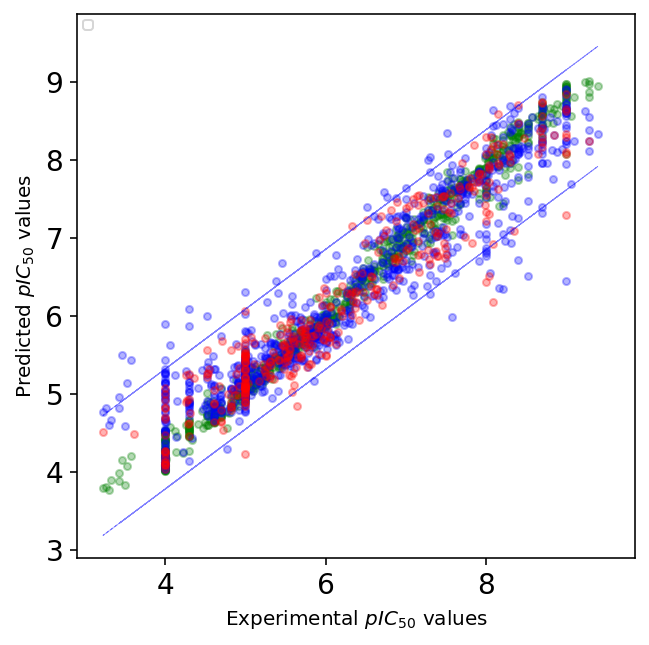

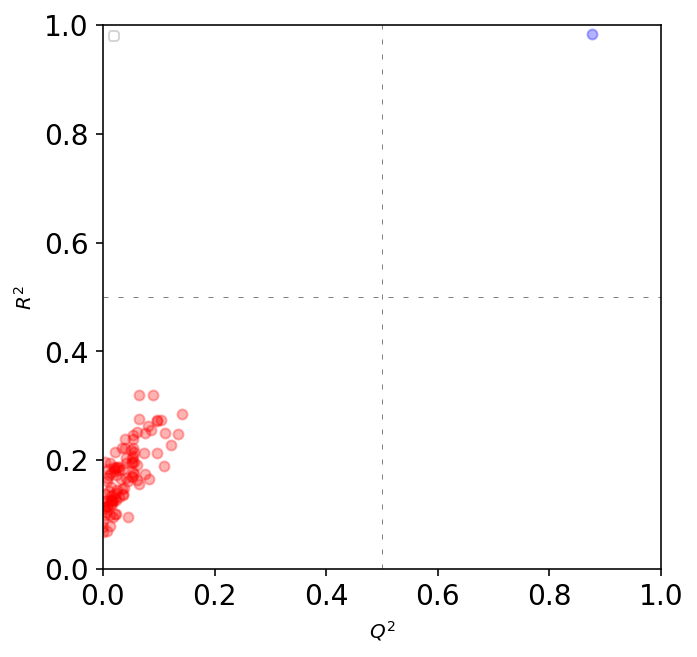

top10 ['feature 93', 'feature 71', 'feature 15', 'feature 44', 'feature 24', 'feature 47', 'feature 29', 'feature 85', 'feature 90', 'feature 36']

top20 ['feature 93', 'feature 71', 'feature 15', 'feature 44', 'feature 24', 'feature 47', 'feature 29', 'feature 85', 'feature 90', 'feature 36', 'feature 43', 'feature 22', 'feature 51', 'feature 89', 'feature 76', 'feature 8', 'feature 63', 'feature 84', 'feature 45', 'feature 56']

top30 ['feature 93', 'feature 71', 'feature 15', 'feature 44', 'feature 24', 'feature 47', 'feature 29', 'feature 85', 'feature 90', 'feature 36', 'feature 43', 'feature 22', 'feature 51', 'feature 89', 'feature 76', 'feature 8', 'feature 63', 'feature 84', 'feature 45', 'feature 56', 'feature 82', 'feature 46', 'feature 53', 'feature 59', 'feature 52', 'feature 42', 'feature 69', 'feature 74', 'feature 88', 'feature 33']

top40 ['feature 93', 'feature 71', 'feature 15', 'feature 44', 'feature 24', 'feature 47', 'feature 29', 'feature 85', 'feature 90', 'feat

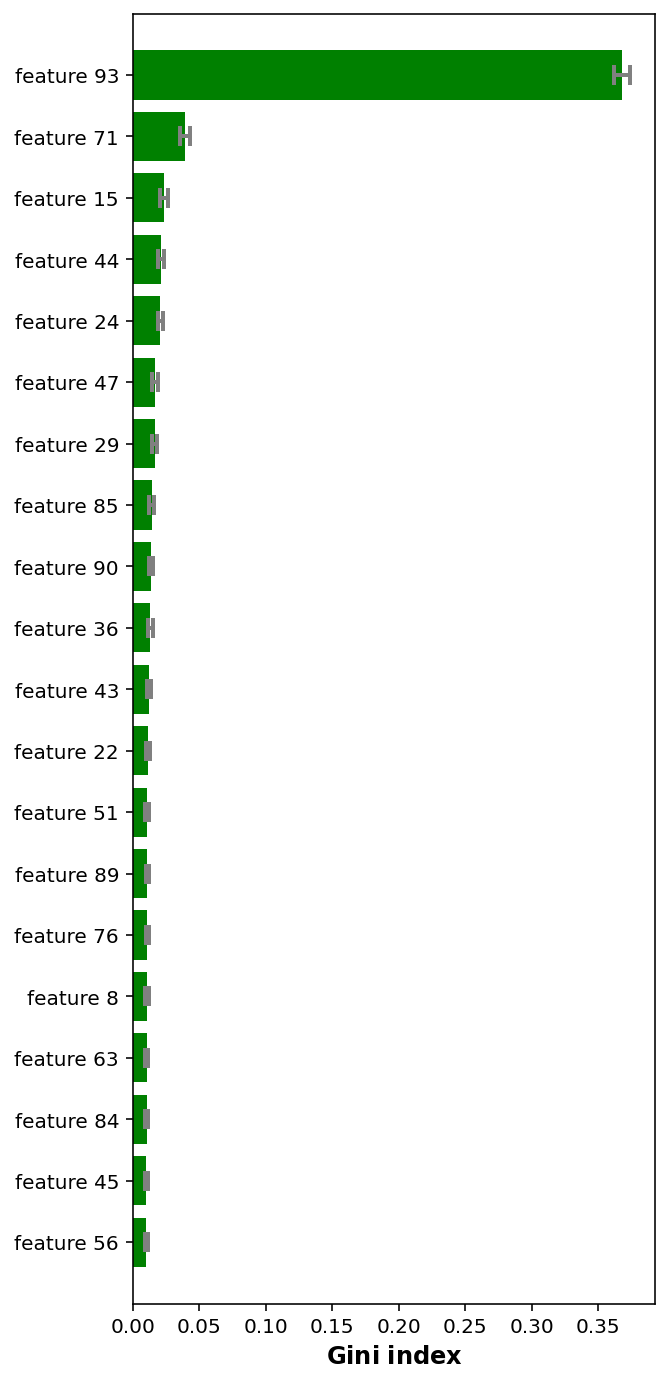

In [31]:
import glob # to read multiple files 
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import os

%config InlineBackend.figure_format = 'retina'

outfile = open('/content/PLK1_pIC50_output_MACCS.csv', 'a')

print(outfile, 'Filename,N_train,Descriptors,Remove STDEV,Remove correlation,'+\
                    'R2_train,R2_train_std,' + \
                    'MAE_train,MAE_train_std,N_CV,Q2_CV,Q2_CV_std,MAE_CV,' + \
                    'MAE_CV_std,N_External,Q2_External,Q2_External_std,MAE_External,MAE_External_std')



for f in glob.glob('/content/PLK1_pIC50_MACCS_normalized.csv'):
    df = pd.read_csv(f)
    df = df.apply(lambda x: pd.to_numeric(x,errors='ignore'))
    df = df.fillna(method='ffill')
    Y = df["pIC50"].to_numpy().astype(np.float)
    data = df.iloc[:,1:]
    
    print('\n\n************************************************************************************')
    print('')
    print(f)
    print('')
    
    data, des1, des2 = Remove_useless_descriptor(data, 0.05)  # Remove correlation cut off 95%
    data, des3, des4 = correlation(data, 0.7)  # Remove correlation cut off 0.7

    h = data.columns.tolist()
    hx = np.array(h)

    data = data.to_numpy().astype(np.float)
    X = np.array(data)
    
    # Prepare empty lists to plot QSAR model
    R2_train = []
    RMSE_train = []
    Q2_CV = []
    RMSE_CV = []
    Q2_External = []
    RMSE_External = []
    importances_dict = defaultdict(list)
    
    # Prepare empty lists to plot the performance of accuracy.
    acclist_realRF                          = []
    acclist_realRF_predictTrain             = []
    acclist_predictionOnTest_scrambledtrain  = []
    acclist_predictionOnTrain_scrambledtrain = []
        
    for i in range(10):
        R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict = build_model(X, Y, i, hx, f)
            
    acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain = Y_scrambling( \
                                                                        X_internal, X_external, Y_internal, Y_external)
    R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
        RMSE_External_mean, importances_mean = mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
        RMSE_External_std, importances_std = std(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2)
    plot_model(f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction,
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain)
    
outfile.close()
    #END

### MACCS fingerprints' descriptors 
https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py


The MACCS (Molecular ACCess System) keys are one of the most commonly used structural keys. They are sometimes referred to as the MDL keys, named after the company that developed them [the MDL Information Systems (now BIOVIA)]. While there are two sets of MACCS keys (one with 960 keys and the other containing a subset of 166 keys), only the shorter fragment definitions are available to the public. These 166 public keys are implemented in popular open-source cheminformatics software packages, including RDKit, OpenBabel, CDK , etc.